In [10]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

df = pd.read_csv('./coaster_db.csv')

In [12]:
df.head()

df.columns
# df = df.drop(columns=['Location', 'Status', 'Opening date',
#        'Type',  'Model', 'Height',
#        'speed_mph', 'height_value', 'Height restriction' , 'height_unit', 'height_ft',
#        'Inversions_clean', 'Gforce_clean']).copy()

df = df[['coaster_name',
       #    'Length', 'Speed', 
       'Location', 'Status', 
      #  'Opening date',
       # 'Type',
         'Manufacturer',
       #   , 'Height restriction', 'Model', 'Height',
       # 'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       # 'Track layout', 'Fastrack available', 'Soft opening date.1',
       # 'Closing date'
       # , 
      #  'Opened',
       #   'Replaced by', 'Website',
       # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       # 'Single rider line available', 'Restraint Style',
       # 'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
       # 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph',
       # , 
       # height_value', 'height_unit', 
       'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()
    

In [13]:
df.rename(columns={'coaster_name': 'Coaster_Name',
                   'Manufacturer': 'Manufacturer',
                   'Opened': 'Opened',
                   'year_introduced': 'Year_Introduced',
                   'latitude': 'Latitude',
                   'longitude': 'Longitude',
                   'Type_Main': 'Type Main',
                   'opening_date_clean': 'Opening_Date',
                   'speed_mph': 'Speed',
                   'height_ft': 'Height',
                   'Inversions_clean': 'Inversions',
                   'Gforce_clean': 'GForce'}, inplace=True)

In [14]:
df.loc[df.duplicated(subset=['Coaster_Name'])]


,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type Main,Opening_Date,Speed,Height,Inversions,GForce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaN,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaN,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7


In [15]:
#Checking an example Duplicate
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type Main,Opening_Date,Speed,Height,Inversions,GForce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [16]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'Latitude', 'Longitude', 'Type Main', 'Opening_Date', 'Speed', 'Height',
       'Inversions', 'GForce'],
      dtype='object')

In [25]:
#inverse of Duplicates
df = df.loc[~df.duplicated(subset=['Coaster_Name', 'Location' ,'Opening_Date' ])].reset_index(drop=True)
df.head(5)

,level_0,index,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type Main,Opening_Date,Speed,Height,Inversions,GForce
0,0,0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,1,1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,2,2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,3,3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,4,4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


## Feature Analysis

Text(0, 0.5, 'Count')

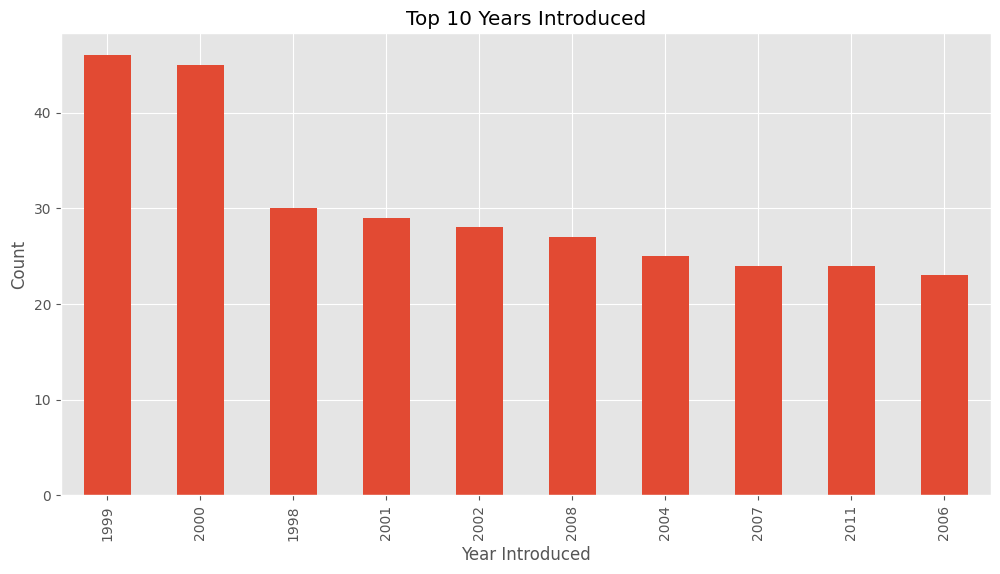

In [32]:
##Counts instances of that attribute
ax = df['Year_Introduced'].value_counts().head(10).plot(kind='bar', figsize=(12, 6), title='Top 10 Years Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

Text(0, 0.5, 'Frequency')

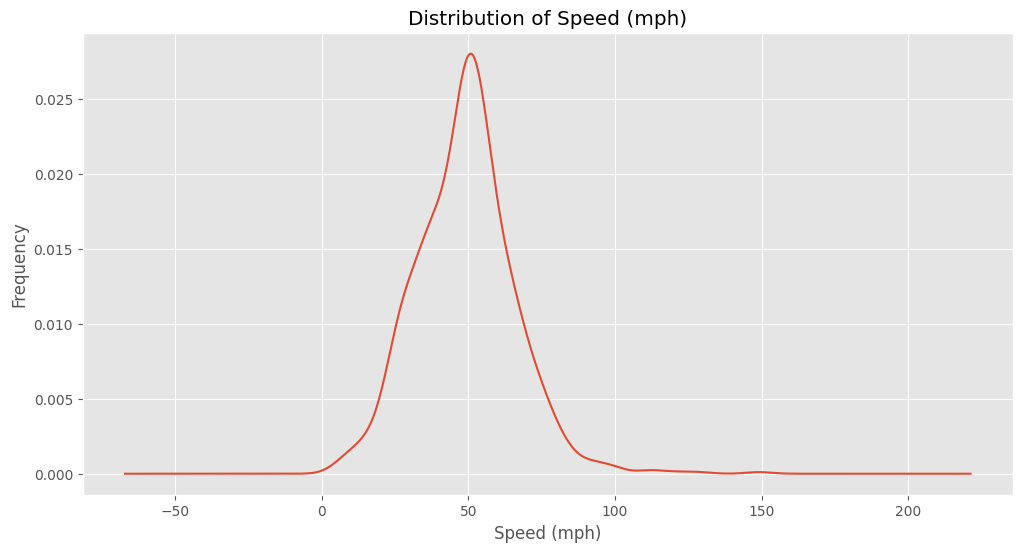

In [39]:
# 
ax = df['Speed'].plot(kind='kde',  figsize=(12, 6), title='Distribution of Speed (mph)')
ax.set_xlabel('Speed (mph)')
ax.set_ylabel('Frequency')